# Machine Learning: SVM plus Other Classification Method

The dataset for the assignment is "Date Fruit Datasets" file you can find from [Date_Fruit_Datasets.xlsx](data/Date_Fruit_Datasets.xlsx), which contains 898 rows and 34 columns of data about dates and a column telling the species of dates.

There are **seven** (**7**) date fruit species in the dataset, so this is **multi-class classification problem**.

More information about the data and related research: [https://www.muratkoklu.com/datasets/](https://www.muratkoklu.com/datasets/).


In [41]:
student_name = 'Juha-Matti Hellsten'

## Topic: Data Preprocessing 
The dataset has a class variable (*target*) in the last column.

Let's do the following preprocessing steps with the dataset:

1. Load the data into the `DataFrame`.
2. Name the columns of the `DataFrame` according to the dataset.
3. Preprocess the dataset
   * Optimize the data input to the machine learning model
   * You can remove "unnecessary features" at your discretion
   * Handling of abnormal (outliers) or empty data values
   * Remember that all categories should be numeric
4. Scale column values by normalizing them.

In [42]:
# TODO: Write your code in this cell
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

df = pd.read_excel('Date_Fruit_Datasets.xlsx')

features_to_remove = [
   'SHAPEFACTOR_2',  
   'EntropyRR', 'EntropyRG', 'EntropyRB'  
]

df_cleaned = df.drop(columns=features_to_remove)

def handle_outliers(df, column):
   Q1 = df[column].quantile(0.25)
   Q3 = df[column].quantile(0.75)
   IQR = Q3 - Q1
   lower_bound = Q1 - 1.5 * IQR
   upper_bound = Q3 + 1.5 * IQR
   df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
   return df

numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
   df_cleaned = handle_outliers(df_cleaned, column)

X = df_cleaned.drop('Class', axis=1)
y = df_cleaned['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df_preprocessed = pd.DataFrame(X_scaled, columns=X.columns)
df_preprocessed['Class'] = y

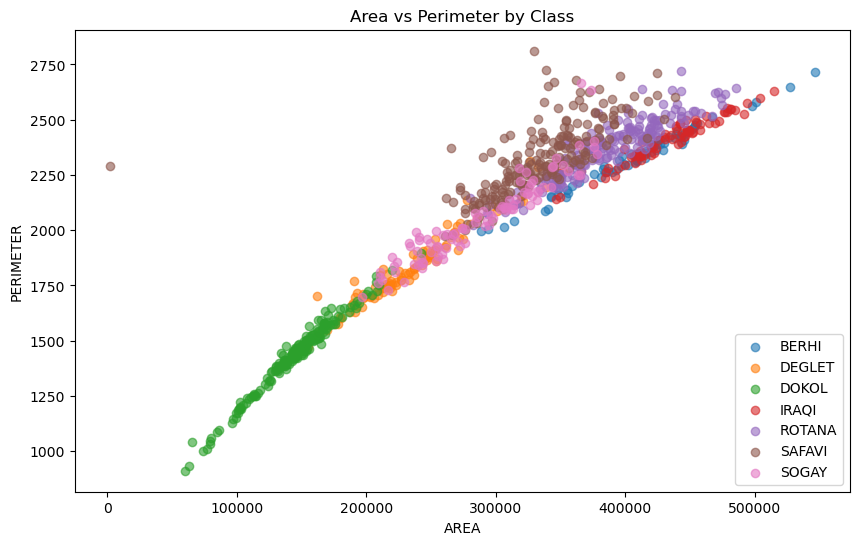

In [57]:
# TODO: Plotting features 
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for class_name in df['Class'].unique():
    mask = df['Class'] == class_name
    plt.scatter(df[mask]['AREA'], df[mask]['PERIMETER'], 
               label=class_name, alpha=0.6)
plt.xlabel('AREA')
plt.ylabel('PERIMETER')
plt.title('Area vs Perimeter by Class')
plt.legend()
plt.show()


In [44]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the assignment.
# The DataFrame should be in the df variable.
print(f'Columns: {df.columns}')
print(f'First row by position: {df.iloc[0]}')

Columns: Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB', 'Class'],
      dtype='object')
First row by position: AREA                   422163
PERIMETER            2378.908
MAJOR_AXIS           837.8484
MINOR_AXIS           645.6693
ECCENTRICITY           0.6373
EQDIASQ              733.1539
SOLIDITY               0.9947
CONVEX_AREA            424428
EXTENT                 0.7831
ASPECT_RATIO           1.2976
ROUNDNESS              0.9374
COMPACTNESS             0.875
SHAPEFACTOR_1           0.002
SHAPEFACTOR_2          0.0015
SHAPEFACTOR_3          

## Training and Testing Data

Split the data into training and testing data using the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function of the `scikit-learn` library.
Put *75%* of the data in training data.

1. Save the training data and its class variable to the variables `X_train`, `y_train`,
2. Save the test data to the variables `X_test`, `y_test`.

If you think there are unnecessary variables in the data, you should remove them at this stage.

Use the number `1550` as the random seed and the size of the test data *25%*.

In [45]:
# TODO: Write your implementation in this cell.
# TODO: Choose the appropriate scaling method
# TODO: Normalize the data

from sklearn.model_selection import train_test_split

X = df_preprocessed.drop('Class', axis=1)
y = df_preprocessed['Class']

X_train, X_test, y_train, y_test = train_test_split(
   X, 
   y,
   test_size=0.25,
   random_state=1550)

In [46]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the assignment.

df_X_train = pd.DataFrame(X_train, columns=X.columns)
#
print(len(df))
print(len(X_train))
print(len(X_test))
#
df_X_train.head()

898
673
225


,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,StdDevRB,SkewRR,SkewRG,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
686,0.610930,0.650342,0.742033,0.401805,0.430069,0.638330,0.191901,0.599084,-0.771947,0.220032,...,-1.067320,0.721034,1.162261,0.515789,0.177382,1.101800,0.315683,-1.291009,-1.311505,-1.249981
210,-1.496128,-1.593803,-1.571900,-1.409437,0.350438,-1.564242,0.297525,-1.508827,0.890772,0.123906,...,0.016086,-0.800937,-0.818428,-0.786223,-0.659754,-0.571657,-0.726580,0.255953,0.381839,0.386313
768,-0.010460,0.239878,0.201640,-0.066307,0.480424,0.087055,-1.181206,0.018449,-1.389746,0.282093,...,-1.589799,2.192101,1.420335,0.820522,1.988376,0.755897,0.851454,-1.511020,-1.441480,-1.466592
520,0.759504,0.658042,0.402206,0.945676,-0.853392,0.762457,-0.230593,0.763214,0.988018,-0.914342,...,0.674750,-0.996232,-1.133949,-1.211305,-0.208208,-0.401805,-0.350678,0.963812,0.969456,0.862365
71,-0.304092,-0.216843,-0.026953,-0.362792,0.642028,-0.194978,0.777633,-0.330969,0.480813,0.496743,...,-0.115981,-0.468731,-0.719990,-0.154263,-0.912074,-0.760046,-0.779845,0.793489,0.712664,0.677490


## Implement Support Vector Machine Classification

1. Use the `scikit-learn` library's *Linear Support Vector Classification* function to train a classifier with your training data that classifies each date fruit species.

2. Create predictions for the data points of your test data in the `y_pred` variable.

3. Use the `metrics` module to make a [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) for the predictions of your test data. Save results to the `cr` variable.

4. Use the `metrics` module to make a **confusion matrix** and store it in the `cm` variable.

In [47]:
# TODO: Write your implementation in this cell.
# TODO: use LinearSVC.

from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

svm = LinearSVC(random_state=1550)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [48]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the assignment.
# The results are in cm and cr variables.
print(f'Classification report:\n {cr}')
print(f'Confusion matrix:\n {cm}')

Classification report:
               precision    recall  f1-score   support

       BERHI       0.89      0.89      0.89        19
      DEGLET       0.71      0.71      0.71        17
       DOKOL       0.94      0.94      0.94        54
       IRAQI       0.90      0.90      0.90        21
      ROTANA       0.98      0.98      0.98        44
      SAFAVI       1.00      1.00      1.00        47
       SOGAY       0.87      0.87      0.87        23

    accuracy                           0.93       225
   macro avg       0.90      0.90      0.90       225
weighted avg       0.93      0.93      0.93       225

Confusion matrix:
 [[17  0  0  2  0  0  0]
 [ 0 12  3  0  0  0  2]
 [ 0  2 51  0  0  0  1]
 [ 2  0  0 19  0  0  0]
 [ 0  1  0  0 43  0  0]
 [ 0  0  0  0  0 47  0]
 [ 0  2  0  0  1  0 20]]


## Comparison with another ML method

For comparison, try to develop the model using another classification method:
* The method can be **RandomForest** (or if you want **DecisionTree** etc., but still justify your choice).

So you can freely select the ML classification method used in this comparison.

In [49]:
# TODO: Write your implementation in this cell.
# TODO: Implementation of another Machine Learning Classification method.
# TODO: The method can be RandomForest or any other method that works with this data "well enough".

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=1550)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
rf_cr = classification_report(y_test, rf_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

print("Random Forest Classification Report:")
print(rf_cr)
print("Random Forest Confusion Matrix:")
print(rf_cm)

print("SVM Classification Report:")
print(cr)
print("SVM Confusion Matrix:")
print(cm)

Random Forest Classification Report:
              precision    recall  f1-score   support

       BERHI       1.00      0.79      0.88        19
      DEGLET       0.48      0.65      0.55        17
       DOKOL       0.94      0.91      0.92        54
       IRAQI       0.84      1.00      0.91        21
      ROTANA       1.00      0.95      0.98        44
      SAFAVI       1.00      1.00      1.00        47
       SOGAY       0.81      0.74      0.77        23

    accuracy                           0.90       225
   macro avg       0.87      0.86      0.86       225
weighted avg       0.91      0.90      0.90       225

Random Forest Confusion Matrix:
[[15  0  0  4  0  0  0]
 [ 0 11  3  0  0  0  3]
 [ 0  5 49  0  0  0  0]
 [ 0  0  0 21  0  0  0]
 [ 0  1  0  0 42  0  1]
 [ 0  0  0  0  0 47  0]
 [ 0  6  0  0  0  0 17]]
SVM Classification Report:
              precision    recall  f1-score   support

       BERHI       0.89      0.89      0.89        19
      DEGLET       0.71      

## Analysis of the results

In [50]:
# TODO: Compare the accuracy of the classification results of both classification methods.
# TODO: Compare the confusion matrix of both classification methods with each other.

Q: Are there other good classification methods to apply with this dataset or any other way to improve the classification results?

In overall, SVM performed better overall with an accuracy of 93 %, whereas the accuracy of Random Forest was 90 %. SVM results are more consistent across all classes and precision and recall scores are well balanced.

In SVM Confusion Matrix, most misclassifications occurred with DEGLET class, but SAFAVI had no misclassifications. BERHI and IRAQI had minor confusion between them. Across other classes, there are very few scattered errors. In Random Forest Confusion Matrix, threre are more misclassifications with DEGLET and SOGAY, SAFAVI still maintained perfect classification. As well as in SVM Confusion Matrix, there was some confusion between BERHI and IRAQI.

In conclusion, both models performed well in certain areas and had challenges in other areas. However, SVM seems to be performing better in this challenge in overall. 


Alternative classification methods to apply with this dataset could include k-Nearest Neighbors, neural networks, XGBoost and LightGBM. For SVM, the results might be improved by trying different kernels or feature selection based on importance scores. For random forest, methods for improving the results could include increasing the number of trees and trying differet max depths.
